# Aula 5.1: Clustering <a id='home'></a>

arquivos necessários = `iris.csv`

Nesta aula, iremos examinar o*problema de clustering*. No problema de agrupamento, não sabemos quantas classes existem! Em vez disso, tentamos agrupar as observações em clusters com base em quão semelhantes são as observações.

O agrupamento é útil para segmentar mercados consumidores (tanto em características quanto em geografia) para discriminar preços, por exemplo. Outros acham o agrupamento útil para identificar bots no twitter, encontrar blocos de eleitores que podem estar em cima do muro, combinar pessoas em sites de namoro ou agrupar calouros em dormitórios com base em preferências.

Começaremos nossa discussão usando o algoritmo "K-Means" para identificar clusters nos dados, por ser simples e intuitivo. No final, expandiremos nossa análise para diferentes ideias de agrupamento. A agenda é a seguinte:

1. [Por que clusters? Um exemplo](#dgp)
2. [Escolhendo o número de clusters: o gráfico do cotovelo](#elbow)
3. [Outros métodos de agrupamento](#others)

# 1. Por que Clusters? Um exemplo ([top](#home))<a id="dgp"></a>

O clustering é útil porque nos permite reduzir a dimensionalidade de grandes conjuntos de dados; podemos tornar o Big Data potencialmente pequeno. Começaremos com nosso conjunto de dados de íris porque sabemos que os dados estão realmente agrupados em torno das espécies. E se alguém nos fornecesse dados semelhantes que não incluíssem a variável `species`. Ainda poderíamos identificar esses agrupamentos?

Podemos agrupar muitas características, mas se usarmos apenas duas, podemos visualizá-las em um gráfico de dispersão. Vamos usar as medidas das pétalas.

Vamos fingir que não conhecemos as espécies de cada observação. Usaremos as informações das espécies mais tarde para ver como o método de agrupamento funcionou. Observe que nossa abordagem aqui é semelhante a quando introduzimos a econometria (OLS) e começamos gerando o verdadeiro processo de geração de dados (DGP). Essa abordagem nos permitiu conhecer "a verdade" para que pudéssemos avaliar o quão bem nossa abordagem funcionava sem erros de especificação. Mesma ideia aqui.

Vamos carregar os dados e dar uma olhada para nos lembrarmos do que temos.

In [2]:
import pandas as pd
import sklearn.cluster
import matplotlib.pyplot as plt
import seaborn as sns

iris = pd.read_csv('/content/iris.csv')
iris.head(4)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


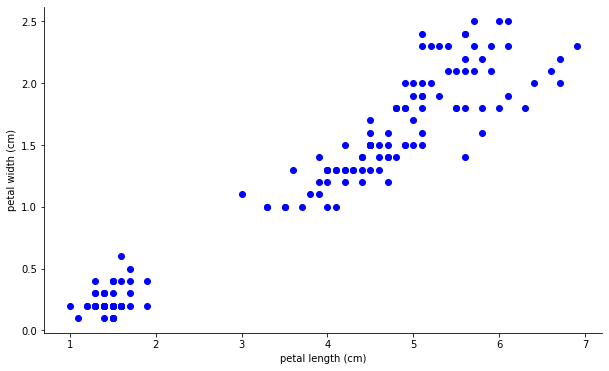

In [5]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(iris['petal length'], iris['petal width'], color='blue')

ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')

sns.despine()

plt.show()

Todos os pontos estão da mesma cor de propósito. Estou fingindo que não sei a qual espécie cada ponto pertence. Na verdade, estou fingindo que nem sei quantas espécies existem.

Eu vejo duas bolhas distintas. Defina $k$ como o número de clusters que observamos nos dados. A partir da imagem, parece razoável supor que existam dois grupos (ou seja, $k=2$) nestes dados, mas é claro que sabemos que existem três. Vamos ajustar o modelo com base em nosso palpite.

Como vimos no problema do classificador, precisamos de arrays numpy para trabalhar com sklearn. Abaixo, converto as duas características em matrizes numpy.

In [6]:
X = iris[['petal width', 'petal length']].to_numpy()

## Agrupamento K-means

O K-means gera agrupamentos procurando por centros de círculos de dados. O algoritmo varia a localização dos centróides dos clusters até minimizar a distância média do centro dos clusters aos seus membros. A receita é, portanto:

1. Selecione um número de classes/grupos para usar e inicialize aleatoriamente seus respectivos pontos centrais. Para descobrir o número de classes a serem usadas, é bom dar uma olhada rápida nos dados e tentar identificar quaisquer agrupamentos distintos (ou seja, o que fizemos acima).


2. Cada ponto de dados é classificado pelo cálculo da distância entre esse ponto e cada centro do grupo. Cada ponto é então classificado como o ponto que está no grupo cujo centro está mais próximo dele.


3. Em seguida, recalculamos o centro do grupo tomando a média de todos os vetores do grupo.


4. Repita essas etapas para um número definido de iterações ou até que os centros do grupo não mudem muito entre as iterações. Você também pode optar por inicializar aleatoriamente os centros de grupo algumas vezes e, em seguida, selecionar a execução que parece fornecer os melhores resultados.


O K-Means tem a vantagem de ser *rápido* (e intuitivo), pois estamos apenas calculando as distâncias entre pontos e centros de grupos. Claro, não existe almoço grátis e veremos que kmeans tem desvantagens. Há também um algoritmo K-Medians que é menos sensível a valores discrepantes, mas também mais lento.

In [7]:
# The random_state option ensures we all get the same answer.
kmeans = sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(X)

O objeto retornado do modelo contém (entre outras coisas) as coordenadas dos centros. Eles são matrizes numpy. Vou convertê-los em um dataframe.

In [8]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['y', 'x'])

In [9]:
# y é a posição vertical e x é a horizontal
centers

,y,x
0,0.260784,1.494118
1,1.681818,4.925253


E vamos representar graficamente os resultados onde os dados brutos denotarei como pontos azuis como antes e estou colocando uma estrela nos centros encontrados acima.

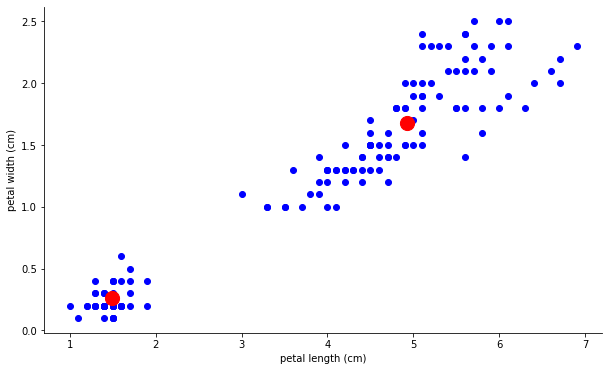

In [10]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(iris['petal length'], iris['petal width'], color='blue')
ax.scatter(centers['x'], centers['y'], color='red', s=200, marker='o')

ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')

sns.despine()

plt.show()

Isso é sobre o que eu esperava de 'olhômetro'.

Pressupomos que não sabíamos quantas classes haviam nos dados, supomos então apenas olhando para a dispersão de dados a quantidade de clusters que os dados possuem.

Sabemos que existem três tipos de íris no conjunto de dados. Vamos tentar 3 clusters e representar graficamente os resultados.

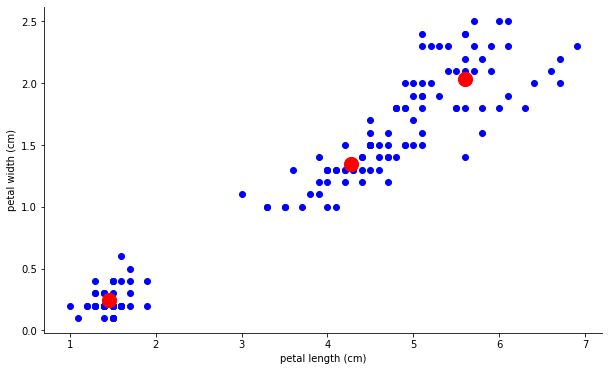

In [11]:
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(X)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['y', 'x'])

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(iris['petal length'], iris['petal width'], color='blue')
ax.scatter(centers['x'], centers['y'], color='red', s=200, marker='o')

ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')

sns.despine()

plt.show()

Esses centródies fazem sentido? Vamos recuperar os `labels` conhecidos para cada um dos pontos:

In [12]:
pred = pd.DataFrame(kmeans.labels_, columns=['predicted'])
iris = pd.merge(left=pred, right=iris, left_index=True, right_index=True)

Vamos dar uma olhada para ver se os dados foram juntados corretamente:

In [ ]:
iris.sample(10)

Então o que aconteceu aqui? O algoritmo de agrupamento identificou três agrupamentos de dados e os rotulou como 0, 1 e 2. Sabemos que os dados são agrupados por espécies, então vamos dar uma olhada em como as categorias se alinham com as espécies.

In [13]:
iris.groupby('species')['predicted'].mean()

species
Iris-setosa        0.00
Iris-versicolor    1.96
Iris-virginica     1.08
Name: predicted, dtype: float64

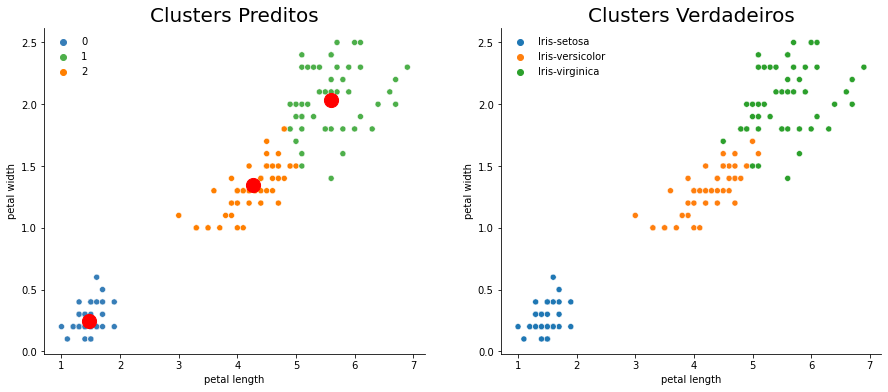

In [14]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(ax=ax[0], x='petal length', y='petal width', hue='predicted', data=iris,palette=['#377eb8', '#4daf4a', '#ff7f00'])

sns.scatterplot(ax=ax[1], x='petal length', y='petal width', hue='species', data=iris)

ax[0].scatter(centers['x'], centers['y'], color='red', s=200, marker='o')

ax[0].set_title('Clusters Preditos',size=20)
ax[1].set_title('Clusters Verdadeiros',size=20)

ax[0].legend(frameon=False)
ax[1].legend(frameon=False)

sns.despine(ax=ax[0])
sns.despine(ax=ax[1])

plt.show()

Observamos nos dados groupby e nas imagens que o algoritmo faz um bom trabalho. O cluster setosa é perfeito &mdash; o que não é surpreendente. A divisão entre os outros dois tipos é decente, mas não perfeita, pois esses dados se sobrepõem mais.

# 2. Escolhendo o número de clusters: o gráfico de cotovelo. ([top](#home))<a id="elbow"></a>

Quando olhei para os dados e fingi que não sabia quantas espécies havia, pensei que eram dois aglomerados. Quando adicionei um terceiro, ele fez um bom trabalho combinando os dados.

Mas o ponto principal desses modelos é que **não sabemos quantos clusters existem.** Então, como escolhemos o número de clusters?

A resposta curta: Tente um monte para ver o que acontece.

Podemos fazer um loop sobre o número de clusters e acompanhar a soma da distância quadrada entre os centros dos clusters e os membros dos clusters. Se houver lacunas nos dados (ou seja, clusters), adicionar um cluster adicional reduzirá drasticamente essas distâncias. A soma da medida da distância ao quadrado é capturada no método `inertia`. Vamos ver como isso funciona:

In [15]:
y=[]  # Start with an empty df
for n in range(1,8):  # loop from 1 to 7 clusters
    kmeans = sklearn.cluster.KMeans(n_clusters=n, random_state=0).fit(X)
    y.append(kmeans.inertia_)
    
y

[550.6434666666669,
 86.40394533571003,
 31.38775897435897,
 19.499400899685114,
 13.933308757908755,
 11.107174889156015,
 9.225808730158732]

Parece que esses números mudam muito. Vamos dar uma olhada nas medidas em uma imagem:

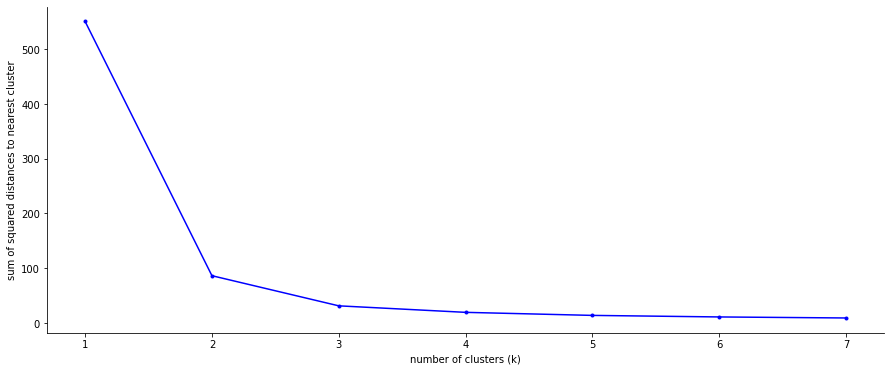

In [16]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(range(1,8), y, color='blue', marker='.')

ax.set_xlabel('number of clusters (k)')

ax.set_ylabel('sum of squared distances to nearest cluster')

sns.despine(ax=ax)

Vemos que a mudança de 1 para 2 clusters fez uma grande melhoria, como uma espécie de "cotovelo" do gráfico porque a figura parece um braço, eu acho. Passar de 2 para 3 clusters não melhorou tanto assim.

Sempre podemos diminuir a soma da distância ao quadrado aumentando k. Quando k é igual ao número de observações, então cada cluster tem exatamente uma observação e a soma dos quadrados é zero. Mas isso não é muito útil: diríamos que há retornos decrescentes para k.

A partir desta figura, eu escolheria k=2 ou k=3. Depois disso, não obtemos muita melhoria nas somas dos quadrados.

# Atividade 1

Vamos tentar responder à seguinte pergunta: quais cidades do Ceará são semelhantes a cidades do estado de Pernambuco? Talvez sua empresa tenha gasto muito dinheiro pesquisando o Ceará como um mercado. Agora quer se expandir para Pernambuco. Podemos encontrar cidades em Pernambuco que sejam semelhantes às do Ceará? Vamos usar nosso modelo de cluster para ver.

1. Vamos carregar uma base de dados da [API do IBGE](https://servicodados.ibge.gov.br/api/docs/)
**OBS**: pode ser necessário gerar uma query [neste link](https://servicodados.ibge.gov.br/api/docs/agregados?versao=3#api-bq)

In [17]:
import requests                    # api module
import json

url = 'https://servicodados.ibge.gov.br/api/v3/agregados/3974/periodos/2010/variaveis/3948?localidades=N6[N3[23,26]]&classificacao=12085[100543]|58[95253]'
    
response = requests.get(url)

Vamos observar o valor da resposta obtida

In [18]:
resp = response.json()
print(resp)

[{'id': '3948', 'variavel': 'Valor do rendimento nominal médio mensal domiciliar per capita das pessoas de 10 anos ou mais de idade, com rendimento mensal domiciliar per capita, residentes em domicílios particulares, exclusive as pessoas cuja condição no domicílio era pensionista, empregado(a) doméstico(a) ou parente do(a) empregado(a) doméstico(a)', 'unidade': 'Reais', 'resultados': [{'classificacoes': [{'id': '12085', 'nome': 'Situação de ocupação na semana de referência', 'categoria': {'100543': 'Total'}}, {'id': '58', 'nome': 'Grupo de idade', 'categoria': {'95253': 'Total'}}], 'series': [{'localidade': {'id': '2300101', 'nivel': {'id': 'N6', 'nome': 'Município'}, 'nome': 'Abaiara - CE'}, 'serie': {'2010': '240.9'}}, {'localidade': {'id': '2300150', 'nivel': {'id': 'N6', 'nome': 'Município'}, 'nome': 'Acarape - CE'}, 'serie': {'2010': '274.9'}}, {'localidade': {'id': '2300200', 'nivel': {'id': 'N6', 'nome': 'Município'}, 'nome': 'Acaraú - CE'}, 'serie': {'2010': '276.3'}}, {'locali

A resposta JSON está em níveis. Vamos precisar nos níveis acessando a chave 'resultados:

In [20]:
for item in resp:
  for key in item['resultados']:
    respJson = key
respJson.pop('classificacoes')

[{'categoria': {'100543': 'Total'},
  'id': '12085',
  'nome': 'Situação de ocupação na semana de referência'},
 {'categoria': {'95253': 'Total'}, 'id': '58', 'nome': 'Grupo de idade'}]

Vamos verificar o formato do novo arquivo JSON:

In [21]:
print(respJson)

{'series': [{'localidade': {'id': '2300101', 'nivel': {'id': 'N6', 'nome': 'Município'}, 'nome': 'Abaiara - CE'}, 'serie': {'2010': '240.9'}}, {'localidade': {'id': '2300150', 'nivel': {'id': 'N6', 'nome': 'Município'}, 'nome': 'Acarape - CE'}, 'serie': {'2010': '274.9'}}, {'localidade': {'id': '2300200', 'nivel': {'id': 'N6', 'nome': 'Município'}, 'nome': 'Acaraú - CE'}, 'serie': {'2010': '276.3'}}, {'localidade': {'id': '2300309', 'nivel': {'id': 'N6', 'nome': 'Município'}, 'nome': 'Acopiara - CE'}, 'serie': {'2010': '292.6'}}, {'localidade': {'id': '2300408', 'nivel': {'id': 'N6', 'nome': 'Município'}, 'nome': 'Aiuaba - CE'}, 'serie': {'2010': '222.9'}}, {'localidade': {'id': '2300507', 'nivel': {'id': 'N6', 'nome': 'Município'}, 'nome': 'Alcântaras - CE'}, 'serie': {'2010': '261.8'}}, {'localidade': {'id': '2300606', 'nivel': {'id': 'N6', 'nome': 'Município'}, 'nome': 'Altaneira - CE'}, 'serie': {'2010': '262.3'}}, {'localidade': {'id': '2300705', 'nivel': {'id': 'N6', 'nome': 'Mun

Nosso objeto JSON está bastante aninhado, ainda (nested). Vamos tentar utilizar o método [json_normalize](https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html) da biblioteca PANDAS:

In [22]:
import pandas as pd
pibPerCapita_CE_PE = pd.json_normalize(respJson['series'])
pibPerCapita_CE_PE.head()

,localidade.id,localidade.nivel.id,localidade.nivel.nome,localidade.nome,serie.2010
0,2300101,N6,Município,Abaiara - CE,240.9
1,2300150,N6,Município,Acarape - CE,274.9
2,2300200,N6,Município,Acaraú - CE,276.3
3,2300309,N6,Município,Acopiara - CE,292.6
4,2300408,N6,Município,Aiuaba - CE,222.9


UFA! Conseguimos obter um dataframe a partir dos dados da API do IBGE. Vamos fazer algumas modificações no dataframe:

In [23]:
pibPerCapita_CE_PE.drop(columns=[pibPerCapita_CE_PE.columns[1],pibPerCapita_CE_PE.columns[2]],inplace=True)
pibPerCapita_CE_PE.head()

,localidade.id,localidade.nome,serie.2010
0,2300101,Abaiara - CE,240.9
1,2300150,Acarape - CE,274.9
2,2300200,Acaraú - CE,276.3
3,2300309,Acopiara - CE,292.6
4,2300408,Aiuaba - CE,222.9


In [24]:
pibPerCapita_CE_PE.rename(columns = {pibPerCapita_CE_PE.columns[0]:'ID', 
                                     pibPerCapita_CE_PE.columns[1]:'CIDADE', 
                                     pibPerCapita_CE_PE.columns[2]: 'PIB'}, inplace = True)
pibPerCapita_CE_PE.set_index('ID', inplace = True)

Ainda podemos separar a localidade em UF + Cidade, vamos fazer:

In [25]:
pibPerCapita_CE_PE[['CIDADE','UF']] = pibPerCapita_CE_PE['CIDADE'].str.split(' - ',1).tolist()
pibPerCapita_CE_PE.head()

,CIDADE,PIB,UF
ID,,,
2300101,Abaiara,240.9,CE
2300150,Acarape,274.9,CE
2300200,Acaraú,276.3,CE
2300309,Acopiara,292.6,CE
2300408,Aiuaba,222.9,CE


In [26]:
new_columns = (pibPerCapita_CE_PE.columns.drop('PIB').tolist()) + ['PIB']
pibPerCapita_CE_PE = pibPerCapita_CE_PE[new_columns]
pibPerCapita_CE_PE.head()

,CIDADE,UF,PIB
ID,,,
2300101,Abaiara,CE,240.9
2300150,Acarape,CE,274.9
2300200,Acaraú,CE,276.3
2300309,Acopiara,CE,292.6
2300408,Aiuaba,CE,222.9


Ótimo, temos um dataframe organizado para clusterização. Porém, o PIB per capita sozinho não é útil para nosso problema de clusterização. Precisamos encontrar outra variável: vamos adotar a densidade demográfica:

In [31]:
url = "https://servicodados.ibge.gov.br/api/v3/agregados/1301/periodos/2010/variaveis/616?localidades=N6[N3[23,26]]"
response = requests.get(url)

In [32]:
resp = response.json()

In [33]:
resp

[{'id': '616',
  'resultados': [{'classificacoes': [],
    'series': [{'localidade': {'id': '2300101',
       'nivel': {'id': 'N6', 'nome': 'Município'},
       'nome': 'Abaiara - CE'},
      'serie': {'2010': '58.69'}},
     {'localidade': {'id': '2300150',
       'nivel': {'id': 'N6', 'nome': 'Município'},
       'nome': 'Acarape - CE'},
      'serie': {'2010': '95.69'}},
     {'localidade': {'id': '2300200',
       'nivel': {'id': 'N6', 'nome': 'Município'},
       'nome': 'Acaraú - CE'},
      'serie': {'2010': '68.31'}},
     {'localidade': {'id': '2300309',
       'nivel': {'id': 'N6', 'nome': 'Município'},
       'nome': 'Acopiara - CE'},
      'serie': {'2010': '22.70'}},
     {'localidade': {'id': '2300408',
       'nivel': {'id': 'N6', 'nome': 'Município'},
       'nome': 'Aiuaba - CE'},
      'serie': {'2010': '6.66'}},
     {'localidade': {'id': '2300507',
       'nivel': {'id': 'N6', 'nome': 'Município'},
       'nome': 'Alcântaras - CE'},
      'serie': {'2010': '77.71'}}

In [34]:

for item in resp:
  for key in item['resultados']:
    respJson = key
respJson.pop('classificacoes')

densidade_CE_PE = pd.json_normalize(respJson['series'])
densidade_CE_PE.head()

,localidade.id,localidade.nivel.id,localidade.nivel.nome,localidade.nome,serie.2010
0,2300101,N6,Município,Abaiara - CE,58.69
1,2300150,N6,Município,Acarape - CE,95.69
2,2300200,N6,Município,Acaraú - CE,68.31
3,2300309,N6,Município,Acopiara - CE,22.70
4,2300408,N6,Município,Aiuaba - CE,6.66


In [35]:
densidade_CE_PE.drop(columns=[densidade_CE_PE.columns[1],densidade_CE_PE.columns[2],densidade_CE_PE.columns[3]],inplace=True)
densidade_CE_PE.rename(columns = {densidade_CE_PE.columns[0]:'ID', 
                                     densidade_CE_PE.columns[1]: 'DENS'}, inplace = True)
densidade_CE_PE.set_index('ID', inplace = True)
densidade_CE_PE.head()

,DENS
ID,
2300101,58.69
2300150,95.69
2300200,68.31
2300309,22.70
2300408,6.66


Agora podemos juntar os dataframes por ID:

In [30]:
cluster_CE_PE = pd.merge(pibPerCapita_CE_PE, densidade_CE_PE, on="ID")
cluster_CE_PE

,CIDADE,UF,PIB,DENS
ID,,,,
2300101,Abaiara,CE,240.9,58.69
2300150,Acarape,CE,274.9,95.69
2300200,Acaraú,CE,276.3,68.31
2300309,Acopiara,CE,292.6,22.70
2300408,Aiuaba,CE,222.9,6.66
...,...,...,...,...
2616183,Vertente do Lério,PE,241.3,106.93
2616209,Vertentes,PE,364.2,92.82
2616308,Vicência,PE,264.1,134.78


Vamos fazer renda per capita e densidade. Você vê um relacionamento? Um modelo linear seria útil aqui?

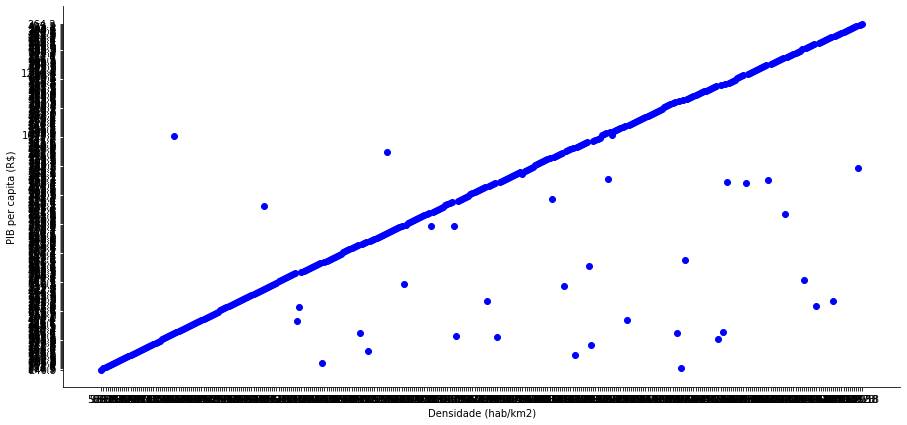

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,7))

ax.scatter(cluster_CE_PE['DENS'], cluster_CE_PE['PIB'], color='blue')

ax.set_xlabel('Densidade (hab/km2)')
ax.set_ylabel('PIB per capita (R$)')
sns.despine(ax=ax)
plt.show()

Vamos o gráfico do cotovelo usando `DENS` e `PIB` como variáveis. Tente de 1 a 10 clusters possíveis. Lembre-se, você precisa converter seus dados DataFrame em matrizes numpy.

In [37]:
import sklearn.cluster
# Convert to numpy
X = cluster_CE_PE[['DENS', 'PIB']].to_numpy()

# Try the model with 1, 2, ..., 10 clusters. Keep track of the ssd ('inertia')
y=[]
for n in range(1, 11):
    kmeans = sklearn.cluster.KMeans(n_clusters=n, random_state=0).fit(X)
    y.append(kmeans.inertia_)

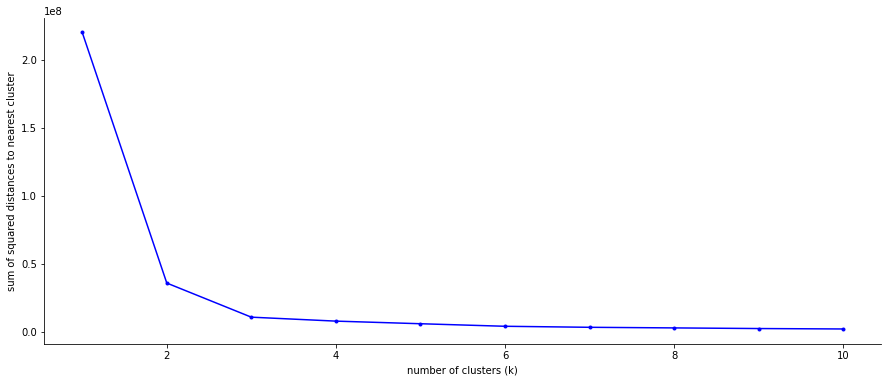

In [38]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(range(1,11), y, color='blue', marker='.')

ax.set_xlabel('number of clusters (k)')

ax.set_ylabel('sum of squared distances to nearest cluster')

sns.despine(ax=ax)

Com base em seu gráfico de cotovelo, quantos clusters parecem apropriados?

**Resposta:** Parece que 3 clusters nos dão um bom insight inicial.

Vamos explorar nossos resultados um pouco mais. Vamos executar o modelo kmeans com k=3

In [39]:
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(X)

Recupere os `labels_` dos resultados.

In [40]:
clusters = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [42]:
clusters.head()

,cluster
0,0
1,0
2,0
3,0
4,0


Mescle os rótulos em seu DataFrame original, usando o índice como chave de mesclagem.

In [43]:
cluster_CE_PE

,CIDADE,UF,PIB,DENS
ID,,,,
2300101,Abaiara,CE,240.9,58.69
2300150,Acarape,CE,274.9,95.69
2300200,Acaraú,CE,276.3,68.31
2300309,Acopiara,CE,292.6,22.70
2300408,Aiuaba,CE,222.9,6.66
...,...,...,...,...
2616183,Vertente do Lério,PE,241.3,106.93
2616209,Vertentes,PE,364.2,92.82
2616308,Vicência,PE,264.1,134.78


In [44]:
detail = pd.merge(left=cluster_CE_PE.reset_index(), right=clusters, left_index=True, right_index=True)
detail[['PIB','DENS']]=detail[['PIB','DENS']].astype(float)
detail.head(2)

,ID,CIDADE,UF,PIB,DENS,cluster
0,2300101,Abaiara,CE,240.9,58.69,0
1,2300150,Acarape,CE,274.9,95.69,0


Vamos plotar `PIB` e `DENS` novamente usando o gráfico de dispersão do seaborn. Defina o matiz para os `labels_` que você recuperou. que padrões você vê? Você pode adicionar rótulos aos pontos para saber quais municípios são quais.

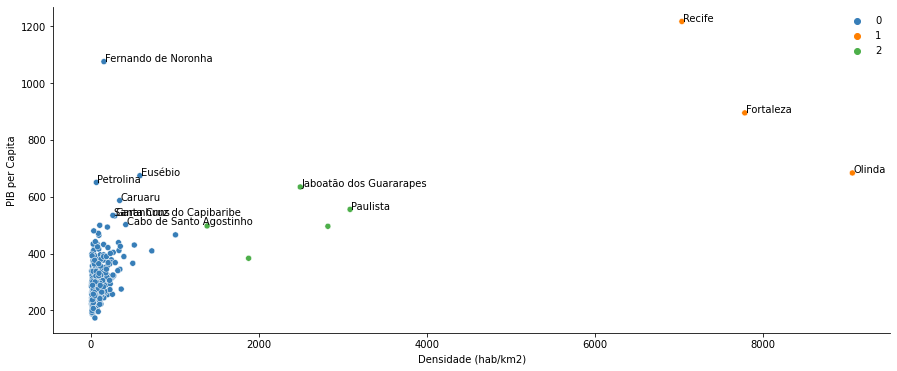

In [45]:
fig, ax = plt.subplots(figsize=(15,6))

sns.scatterplot(ax=ax, x='DENS', y='PIB', hue='cluster', data=detail, palette=['#377eb8', '#ff7f00', '#4daf4a'])

for x,y,t in zip(detail['DENS'], detail['PIB'], detail['CIDADE']):
    if y > 500:
        ax.text(x+10, y+1, t)

ax.set_xlabel('Densidade (hab/km2)')
ax.set_ylabel('PIB per Capita')

sns.despine(ax=ax)
ax.legend(frameon=False)

plt.show()

Vamos refazer com k=4. Como os resultados mudam?

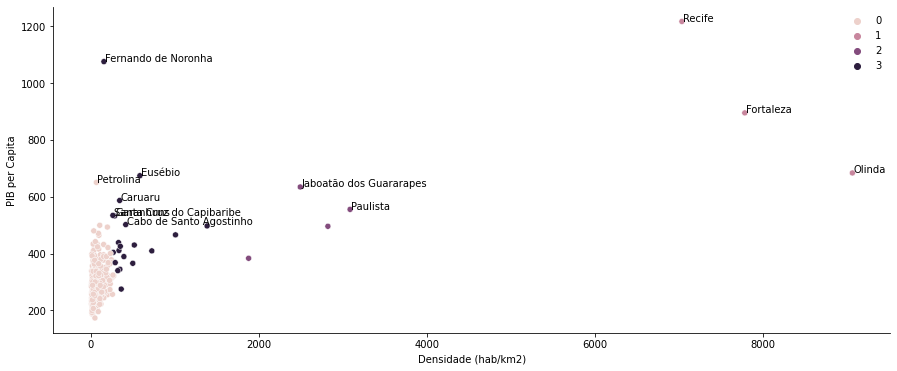

In [46]:
kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=0).fit(X)
clusters = pd.DataFrame(kmeans.labels_, columns=['cluster'])
detail = pd.merge(left=cluster_CE_PE.reset_index(), right=clusters, left_index=True, right_index=True)
detail[['PIB','DENS']]=detail[['PIB','DENS']].astype(float)

fig, ax = plt.subplots(figsize=(15,6))

sns.scatterplot(ax=ax, x='DENS', y='PIB', hue='cluster', data=detail)

for x,y,t in zip(detail['DENS'], detail['PIB'], detail['CIDADE']):
    if y > 500:
        ax.text(x+10, y+1, t)

ax.set_xlabel('Densidade (hab/km2)')
ax.set_ylabel('PIB per Capita')

sns.despine(ax=ax)
ax.legend(frameon=False)

plt.show()

E se aumentarmos para 8 clusters?

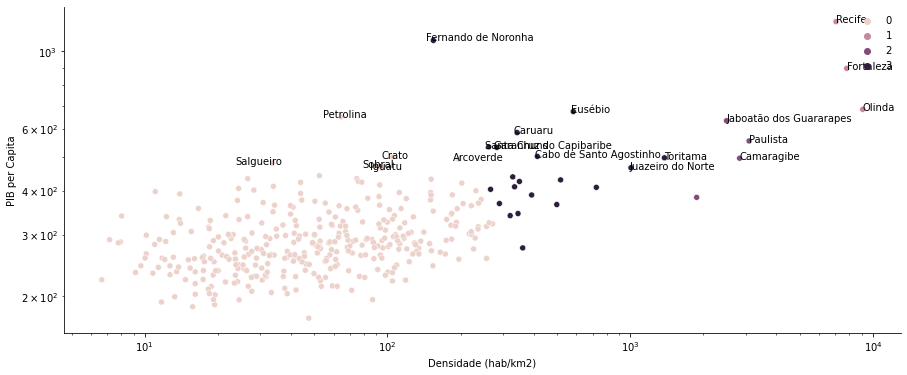

In [47]:
kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=0).fit(X)
clusters = pd.DataFrame(kmeans.labels_, columns=['cluster'])
detail = pd.merge(left=cluster_CE_PE.reset_index(), right=clusters, left_index=True, right_index=True)
detail[['PIB','DENS']]=detail[['PIB','DENS']].astype(float)

fig, ax = plt.subplots(figsize=(15,6))
ax.set(xscale="log", yscale="log")

sns.scatterplot(ax=ax, x='DENS', y='PIB', hue='cluster', data=detail)

for x,y,t in zip(detail['DENS'], detail['PIB'], detail['CIDADE']):
    if y > 450:
        ax.text(x-10, y-5, t)

ax.set_xlabel('Densidade (hab/km2)')
ax.set_ylabel('PIB per Capita')
#ax.set_xlim(10, 500)
#ax.set_ylim(300, 1100)
sns.despine(ax=ax)
ax.legend(frameon=False)

plt.show()

## Comentários

O K-Means tem algumas desvantagens.

1. Você deve selecionar quantos grupos existem. A abordagem do Gráfico de cotovelo ajuda, mas não há teste estatístico para nos apoiarmos - ou pelo menos identificar uma prática recomendada entre diferentes pesquisadores. Isso nem sempre é trivial e, idealmente, com um algoritmo de cluster, gostaríamos que descobrisse isso para nós, porque o objetivo é obter alguns insights dos dados.


2. K-means começa com uma escolha aleatória de centros de cluster e, portanto, pode produzir diferentes resultados de cluster em diferentes execuções do algoritmo. Assim, os resultados podem não ser repetíveis e não ter consistência. Outros métodos de cluster são mais consistentes.


3. O K-means desenha fundamentalmente círculos ao redor dos dados. E se os círculos não forem a melhor maneira de agrupar os dados. Observe os gráficos de dispersão no exercício prático. Os dados de densidade próxima de zero parecem uma coluna (ou seja, muita heterogeneidade na renda per capita), enquanto parece haver uma relação positiva entre densidade e renda per capita entre densidade de 0 e 200. Parece que esses dois grupos deveriam ser clusters diferentes, mas o K-Means terá dificuldade em fazer isso, pois procura por centros de círculos e, portanto, sempre escolherá um centro no meio de ambos os grupos para capturar ambos.

# 3. Outros métodos de agrupamento ([top](#home))<a id="others"></a>

* **Agrupamento de deslocamento médio (MeanShift).** O agrupamento de deslocamento médio é um algoritmo baseado em janela deslizante que tenta encontrar áreas densas de pontos de dados. É um algoritmo baseado em centroides, o que significa que o objetivo é localizar os pontos centrais de cada grupo/classe, que funciona atualizando candidatos para pontos centrais para serem a média dos pontos dentro da janela deslizante. Essas janelas candidatas são então filtradas em um estágio de pós-processamento para eliminar quase duplicatas, formando o conjunto final de pontos centrais e seus grupos correspondentes.

     Em contraste com o clustering K-means, não há necessidade de selecionar o número de clusters, pois o desvio médio descobre isso automaticamente - essa é uma boa vantagem. O fato de os centros dos clusters convergirem para os pontos de densidade máxima também é bastante desejável, pois é bastante intuitivo de entender e se encaixa bem em um sentido naturalmente orientado a dados.

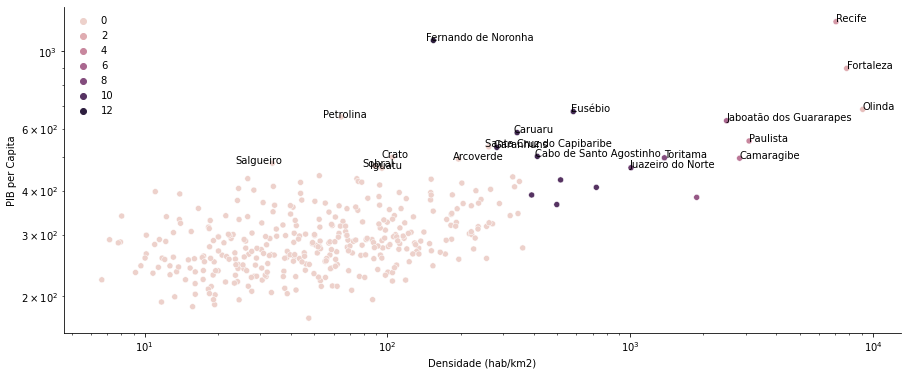

In [48]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X)
clusters = pd.DataFrame(ms.labels_, columns=['cluster'])
detail = pd.merge(left=cluster_CE_PE.reset_index(), right=clusters, left_index=True, right_index=True)
detail[['PIB','DENS']]=detail[['PIB','DENS']].astype(float)

fig, ax = plt.subplots(figsize=(15,6))
ax.set(xscale="log", yscale="log")

sns.scatterplot(ax=ax, x='DENS', y='PIB', hue='cluster', data=detail)

for x,y,t in zip(detail['DENS'], detail['PIB'], detail['CIDADE']):
    if y > 450:
        ax.text(x-10, y-1, t)

ax.set_xlabel('Densidade (hab/km2)')
ax.set_ylabel('PIB per Capita')
#ax.set_xlim(10, 500)
#ax.set_ylim(300, 1100)
sns.despine(ax=ax)
ax.legend(frameon=False)

plt.show()

O algoritmo selecionou 12 clusters. Essa foi uma boa opção de agrupamento para nossos dados? Eu argumentaria "não".

* **Agrupamento espacial de aplicativos com ruído baseado em densidade (DBSCAN).** DBSCAN é uma forma de algoritmo de agrupamento de **vizinho mais próximo** que você normalmente ouve sendo aplicado a dados. A ideia aproximada é que você trabalhe com os dados ao longo das dimensões dos dados e continue adicionando pontos de dados a um cluster até chegar a um conjunto de dados que seja suficientemente diferente. É um algoritmo clusterizado baseado em densidade semelhante ao desvio médio, mas com algumas vantagens notáveis. Primeiro, ele não requer um número pré-definido de clusters. O componente central do DBSCAN é o conceito de *core samples* -- amostras que estão em áreas de alta densidade. Um "cluster" é, portanto, um conjunto de *amostras de núcleo* que estão próximas umas das outras (medidas por alguma medida de distância). Qualquer amostra principal faz parte de um cluster, por definição. Qualquer amostra que não seja uma amostra principal e esteja pelo menos 'eps' de distância de qualquer amostra principal é considerada um valor discrepante. Em segundo lugar, identifica outliers como ruído (o que pode ser útil no nosso caso), enquanto k-means e mean-shift simplesmente os lançam em um cluster, mesmo que o ponto de dados seja muito diferente. Terceiro, ele pode encontrar clusters de tamanho e formato arbitrários muito bem.

    **No lado negativo, pode ser difícil quando há muita variação na densidade do cluster.**
    
    Existem dois parâmetros para o algoritmo: `min_samples` e `eps`. Estes definem formalmente o que queremos dizer quando dizemos "denso".
    
    O parâmetro `min_samples` controla principalmente a tolerância do algoritmo em relação ao ruído (em conjuntos de dados ruidosos e grandes, pode ser desejável aumentar esse parâmetro), embora os resultados não sejam muito sensíveis a esse parâmetro, portanto, não é muito importante IMO. **O parâmetro `eps` é, no entanto, crucial para escolher adequadamente o conjunto de dados.** Ele controla a vizinhança local dos pontos. Quando escolhido muito pequeno, a maioria dos dados não será agrupada (e rotulada como `-1` para "ruído"). Quando escolhido muito grande, faz com que clusters próximos sejam mesclados em um cluster e, eventualmente, todo o conjunto de dados seja retornado como um único cluster. Algumas heurísticas para a escolha deste parâmetro têm sido discutidas na literatura, por exemplo, com base em um cotovelo no gráfico de distâncias do vizinho mais próximo. Vamos dar uma olhada nos nossos dados.
    
    ### Resolvendo para o 'eps' ideal: outro cotovelo

    Podemos calcular a distância de cada ponto ao seu vizinho mais próximo usando o pacote `NearestNeighbors`. O ponto em si está incluído em `n_neighbors`. O método `kneighbors` retorna dois arrays, um que contém a distância para os pontos `n_neighbors` mais próximos e o outro que contém o índice para cada um desses pontos. Assim como em nosso gráfico de cotovelo anterior, estamos procurando um ponto de inflexão em que a mudança de `eps` realmente não tenha efeito sobre as distâncias.

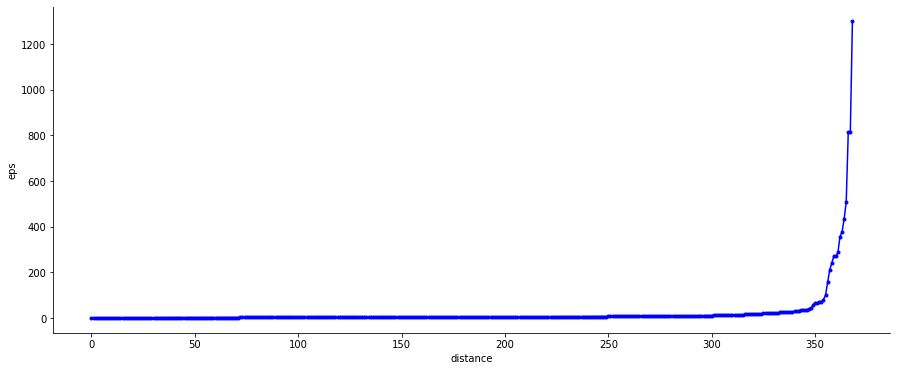

In [49]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort the results
distances = np.sort(distances, axis=0)
distances = distances[:,1]

fig, ax = plt.subplots(figsize=(15,6))

plt.plot(distances, color='blue', marker='.')

ax.set_xlabel('distance')

ax.set_ylabel('eps')

sns.despine(ax=ax)


Parece muita curvatura quando `eps` é igual a 350. Vamos tentar isso.

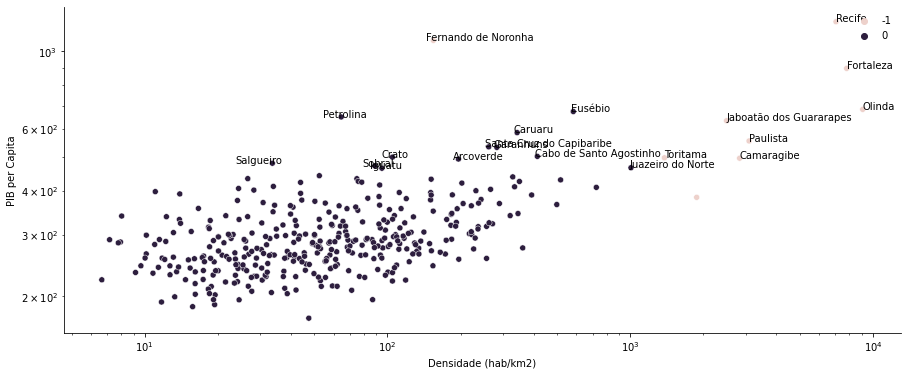

In [50]:
from sklearn.cluster import DBSCAN

# Compute DBSCAN with eps = 350
db = DBSCAN(eps=350, min_samples=5).fit(X)

clusters = pd.DataFrame(db.labels_, columns=['cluster'])
detail = pd.merge(left=cluster_CE_PE.reset_index(), right=clusters, left_index=True, right_index=True)
detail[['PIB','DENS']]=detail[['PIB','DENS']].astype(float)

fig, ax = plt.subplots(figsize=(15,6))
ax.set(xscale="log", yscale="log")

sns.scatterplot(ax=ax, x='DENS', y='PIB', hue='cluster', data=detail)

for x,y,t in zip(detail['DENS'], detail['PIB'], detail['CIDADE']):
    if y > 450:
        ax.text(x-10, y-1, t)

ax.set_xlabel('Densidade (hab/km2)')
ax.set_ylabel('PIB per Capita')
#ax.set_xlim(10, 500)
#ax.set_ylim(300, 1100)
sns.despine(ax=ax)
ax.legend(frameon=False)

plt.show()

Hmmm... não é ótimo. Na verdade, brincar com o `eps` demonstra que estamos apenas mudando quais observações são ruído. Os agrupamentos que observamos com nossos globos oculares são muito heterogêneos para que esse método funcione bem.

* **Agrupamento de Expectativa-Maximização (EM) usando Modelos de Mistura Gaussianas (GMM).** Uma das principais desvantagens do K-Means é seu uso ingênuo do valor médio para o centro do cluster e sua insistência em identificar clusters com círculos. A solução alternativa é relaxar a suposição do círculo e usar modelos de mistura gaussiana (GMMs) para nos dar mais flexibilidade. Com GMMs, assumimos que os pontos de dados são distribuídos em Gauss; esta é uma suposição menos restritiva do que dizer que eles são circulares usando a média. Dessa forma, temos dois parâmetros para descrever a forma dos clusters: a média e o desvio padrão! Tomando um exemplo em duas dimensões, isso significa que os aglomerados podem assumir qualquer tipo de forma elíptica (já que temos um desvio padrão nas direções x e y). Assim, cada distribuição gaussiana é atribuída a um único cluster. Assim, poderíamos usar essa abordagem de agrupamento para identificar os diferentes agrupamentos em nossos dados de prática. Para encontrar os parâmetros da Gaussiana para cada cluster (por exemplo, a média e o desvio padrão), usaremos um algoritmo de otimização chamado Expectativa-Maximização (EM).

    Isso parece ser melhor para os nossos dados. Vamos tentar usando cinco clusters.

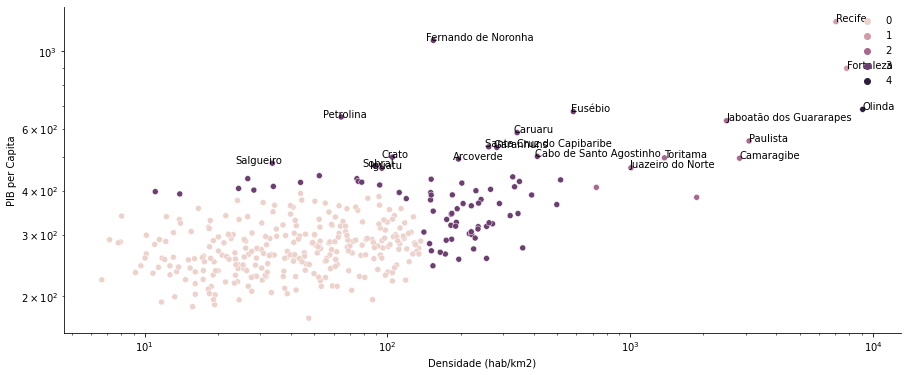

In [51]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=5, random_state=0).fit(X)
clusters = pd.DataFrame(gm.predict(X), columns=['cluster'])
detail = pd.merge(left=cluster_CE_PE.reset_index(), right=clusters, left_index=True, right_index=True)
detail[['PIB','DENS']]=detail[['PIB','DENS']].astype(float)

fig, ax = plt.subplots(figsize=(15,6))
ax.set(xscale="log", yscale="log")

sns.scatterplot(ax=ax, x='DENS', y='PIB', hue='cluster', data=detail)

for x,y,t in zip(detail['DENS'], detail['PIB'], detail['CIDADE']):
    if y > 450:
        ax.text(x-10, y-1, t)

ax.set_xlabel('Densidade (hab/km2)')
ax.set_ylabel('PIB per Capita')
#ax.set_xlim(10, 500)
#ax.set_ylim(300, 1100)
sns.despine(ax=ax)
ax.legend(frameon=False)

plt.show()

* **Cluster hierárquico aglomerativo.** Os algoritmos de agrupamento hierárquico se dividem em 2 categorias: *top-down* ou *bottom-up*. Os algoritmos bottom-up tratam cada ponto de dados como um único cluster no início e, em seguida, mesclam sucessivamente (ou aglomeram) pares de clusters até que todos os clusters tenham sido mesclados em um único cluster que contém todos os pontos de dados. O agrupamento hierárquico de baixo para cima é, portanto, chamado agrupamento aglomerativo hierárquico (HAC). Essa hierarquia de clusters é representada como uma árvore (ou dendrograma). 

A raiz da árvore é o único cluster que reúne todas as amostras, sendo as folhas os clusters com apenas uma amostra. [Para saber mais sobre dendogramas](https://en.wikipedia.org/wiki/Dendrogram) é a página wiki.

Observe que essa técnica pode ser particularmente útil para "redução de recursos" que é popular em finanças (onde esse tipo de análise é conhecido como "Análise de Componentes Principais"). Fundamentalmente, é uma ferramenta útil de redução de dimensionalidade que na linguagem de ML é conhecida como "aprendizagem não supervisionada".
    
Vamos tentar com nossos dados...
    
#### Escolhendo o número de clusters: o dendrograma
Primeiro, temos que decidir quantos clusters designar. Como antes, podemos avaliar os dados diretamente para procurar lacunas. Em vez de um cotovelo, porém, podemos usar um dendrograma para visualizar o histórico de agrupamentos e descobrir o número ideal de agrupamentos. Identificamos o número ideal de clusters da seguinte forma:
1. Determine a maior distância vertical que não cruza nenhum dos outros clusters.
2. Desenhe uma linha horizontal entre as extremidades.
3. O número ideal de clusters é igual ao número de linhas verticais que passam pela linha horizontal.

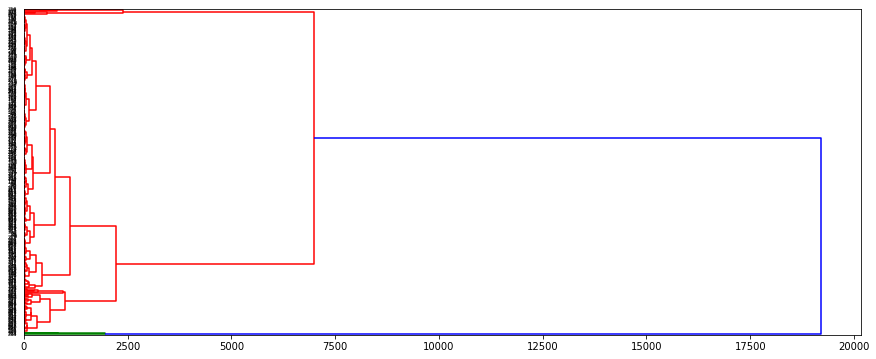

In [52]:
import scipy.cluster.hierarchy as sch # Used to create a dendrogram

fig, ax = plt.subplots(figsize=(15,6))

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'),ax=ax,orientation='right')

# Different methods to measure linkags / distance
# Ward - minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
# Maximum or "complete" - minimizes the maximum distance between observations of pairs of clusters.
# Average - minimizes the average of the distances between all observations of pairs of clusters.
# Single - minimizes the distance between the closest observations of pairs of clusters.

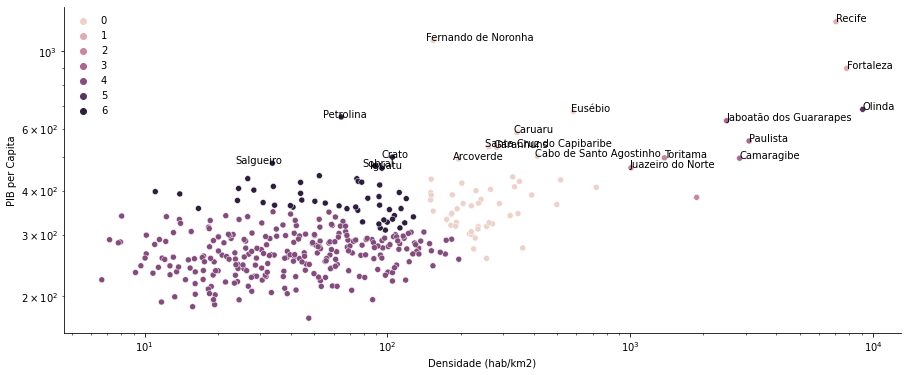

In [53]:
from sklearn.cluster import AgglomerativeClustering

AHC = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward').fit(X)
clusters = pd.DataFrame(AHC.labels_, columns=['cluster'])
detail = pd.merge(left=cluster_CE_PE.reset_index(), right=clusters, left_index=True, right_index=True)
detail[['PIB','DENS']]=detail[['PIB','DENS']].astype(float)

fig, ax = plt.subplots(figsize=(15,6))
ax.set(xscale="log", yscale="log")

sns.scatterplot(ax=ax, x='DENS', y='PIB', hue='cluster', data=detail)

for x,y,t in zip(detail['DENS'], detail['PIB'], detail['CIDADE']):
    if y > 450:
        ax.text(x-10, y-1, t)

ax.set_xlabel('Densidade (hab/km2)')
ax.set_ylabel('PIB per Capita')
#ax.set_xlim(10, 500)
#ax.set_ylim(300, 1100)
sns.despine(ax=ax)
ax.legend(frameon=False)

plt.show()

Isso parece funcionar muito bem também. Esses grupos parecem bastante naturais.

## Resumo de diferentes abordagens

A figura abaixo é da documentação de clustering do scikit e demonstra como diferentes abordagens de clustering (algumas que eu não discuti) fazem para diferentes variações nos dados (fingidos). Os números no canto inferior direito apresentam o tempo de computação que pode ser um problema à medida que seus dados se tornam maiores e o algoritmo de agrupamento se torna mais complexo.

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png">

